# Análise Chile

Neste notebook será feito a análise de serie temporal do Chile com a analise da série temporal de covid no Chile.

In [ ]:
!pip install pymannkendall
# Importando as blibiotecas
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymannkendall as mk
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
serie_chi = pd.read_csv('Séries Temporais Chile.csv')
serie_chi.drop('Unnamed: 0',axis=1,inplace=True)
serie_chi.head()

,Date,Confirmed,Recovered,Deaths,Ano
0,2020-01-22,0,0.0,0,2020
1,2020-01-23,0,0.0,0,2020
2,2020-01-24,0,0.0,0,2020
3,2020-01-25,0,0.0,0,2020
4,2020-01-26,0,0.0,0,2020


In [ ]:
# Transformado a coluna date de object para datetime
serie_chi['Date'] = pd.to_datetime(serie_chi['Date'],format='%Y-%m-%d')
# Criando uma coluna mês
serie_chi['Mês'] = serie_chi['Date'].dt.month

In [ ]:
# Colocando a coluna da data para indice
serie_chi.set_index('Date',inplace=True)
serie_chi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 713 entries, 2020-01-22 to 2022-01-03
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confirmed  713 non-null    int64  
 1   Recovered  713 non-null    float64
 2   Deaths     713 non-null    int64  
 3   Ano        713 non-null    int64  
 4   Mês        713 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 33.4 KB


In [ ]:
serie_chi.head()

,Confirmed,Recovered,Deaths,Ano,Mês
Date,,,,,
2020-01-22,0,0.0,0,2020,1
2020-01-23,0,0.0,0,2020,1
2020-01-24,0,0.0,0,2020,1
2020-01-25,0,0.0,0,2020,1
2020-01-26,0,0.0,0,2020,1


In [ ]:
# Aplicando para casos confirmados
resultado_conf = mk.original_test(serie_chi['Confirmed'])

nomes = ['Tendência','Presença de tendência','p-valor','Estatística do teste',
         'Tau Kendall','Pontuação Kendall','Variância S','Declive','Intercepto']


for i,j in zip(nomes,resultado_conf):
  print(i,":",j)

Tendência : increasing
Presença de tendência : True
p-valor : 0.0
Estatística do teste : 39.87395641428096
Tau Kendall : 0.9979277305892179
Pontuação Kendall : 253302.0
Variância S : 40354795.333333336
Declive : 2940.222620392452
Intercepto : -397584.2528597129


In [ ]:
# Aplicando para óbitos 
resultado_mortes = mk.original_test(serie_chi['Deaths'])

for i,j in zip(nomes,resultado_mortes):
  print(i,":",j)

Tendência : increasing
Presença de tendência : True
p-valor : 0.0
Estatística do teste : 39.680294912131664
Tau Kendall : 0.9928258505759806
Pontuação Kendall : 252007.0
Variância S : 40334063.666666664
Declive : 65.39641634574241
Intercepto : -6099.124219084297


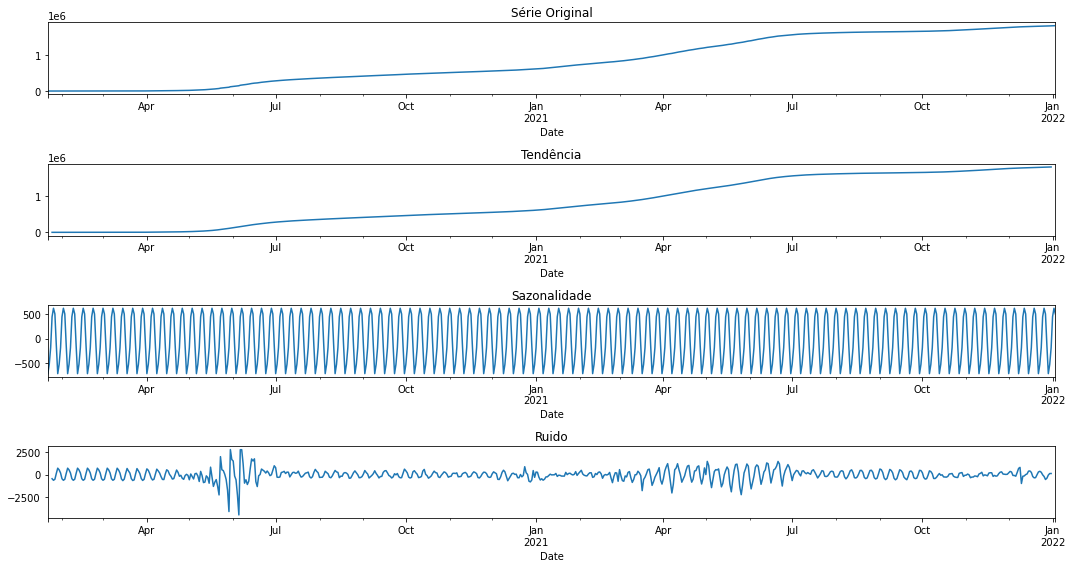

In [ ]:
decom_conf = seasonal_decompose(serie_chi['Confirmed'])

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
decom_conf.observed.plot(ax=ax1,title='Série Original')
decom_conf.trend.plot(ax=ax2,title='Tendência')
decom_conf.seasonal.plot(ax=ax3,title='Sazonalidade')
decom_conf.resid.plot(ax=ax4,title='Ruido')
plt.tight_layout()

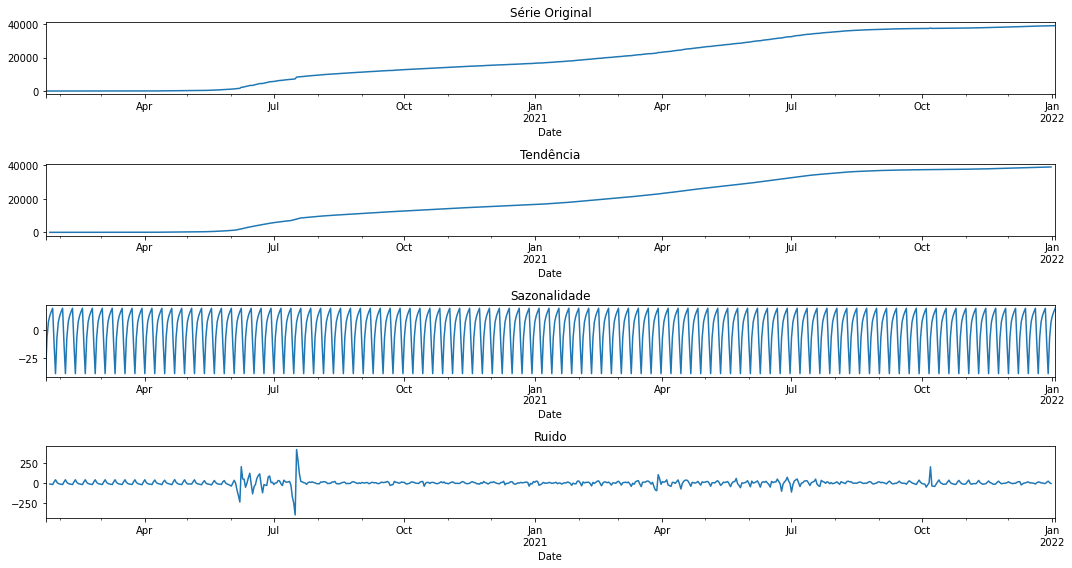

In [ ]:
decom_morte = seasonal_decompose(serie_chi['Deaths'])

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
decom_morte.observed.plot(ax=ax1,title='Série Original')
decom_morte.trend.plot(ax=ax2,title='Tendência')
decom_morte.seasonal.plot(ax=ax3,title='Sazonalidade')
decom_morte.resid.plot(ax=ax4,title='Ruido')
plt.tight_layout()

In [ ]:
# Separação entre treino e teste
treino = serie_chi[(serie_chi['Ano']<=2021)&(serie_chi['Mês']<12)]
teste = serie_chi[(serie_chi['Ano']==2021)&(serie_chi['Mês'] == 12)]

In [ ]:
adf_conf = adfuller(serie_chi['Confirmed'])

print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(adf_conf[0]))
print('Valor-p: {:.4f}'.format(adf_conf[1]))
print('Valores Críticos:')
for key, value in adf_conf[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: -0.1614
Valor-p: 0.9430
Valores Críticos:
	1%: -3.4398
	5%: -2.8657
	10%: -2.5690


In [ ]:
adf_mort = adfuller(serie_chi['Deaths'])

print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(adf_mort[0]))
print('Valor-p: {:.4f}'.format(adf_mort[1]))
print('Valores Críticos:')
for key, value in adf_mort[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: -1.1287
Valor-p: 0.7035
Valores Críticos:
	1%: -3.4398
	5%: -2.8657
	10%: -2.5690


In [ ]:
df_diff_co = serie_chi['Confirmed'].diff(1)
df_diff_mor = serie_chi['Deaths'].diff(1)

In [ ]:
lag_acf_co = acf(df_diff_co.dropna(), nlags=25)
lag_pacf_co = pacf(df_diff_mor.dropna(), nlags=25)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


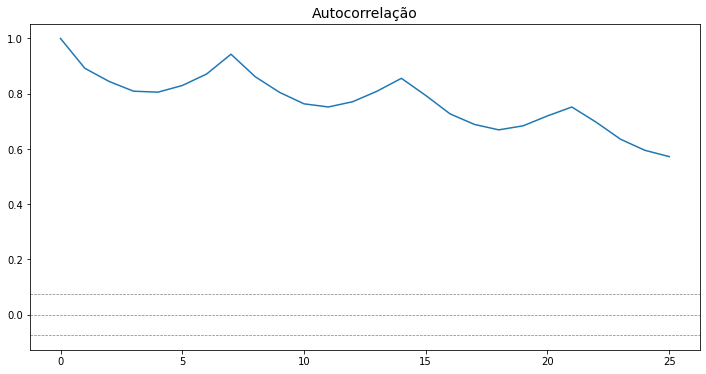

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(lag_acf_co)
plt.axhline(y=-1.96 / (np.sqrt((len(df_diff_co) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / (np.sqrt((len(df_diff_co) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação",fontsize=14)
plt.show()

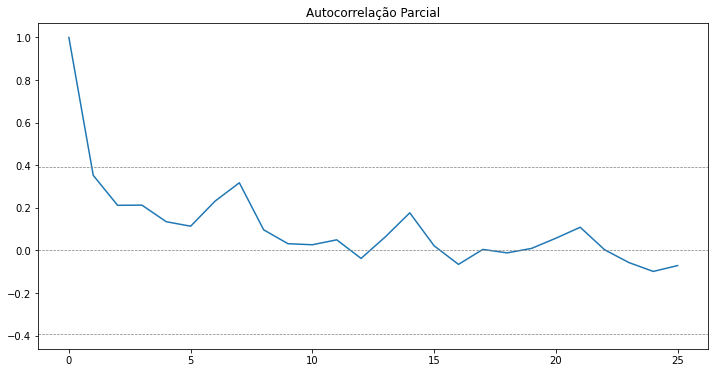

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(lag_pacf_co)
plt.axhline(y=-1.96 / (np.sqrt((len(lag_pacf_co ) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / (np.sqrt((len(lag_pacf_co ) - 1))), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação Parcial")
plt.show()

In [ ]:
model = ARIMA(treino['Deaths'], order=(1,1,1))
result_AR = model.fit(disp = -1)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [ ]:
fc, se, conf = result_AR .forecast(31, alpha=0.05)

In [ ]:
mape = np.mean(np.abs(fc - teste['Deaths'].values)/np.abs(teste['Deaths'].values))
mae = np.mean(np.abs(fc - teste['Deaths'].values)) 
rmse = np.mean((fc - teste['Deaths'])**2)**.5
print(mape)
print(mae)
print(rmse)

0.0010077847152151576
39.2431993490231
55.94499107762204


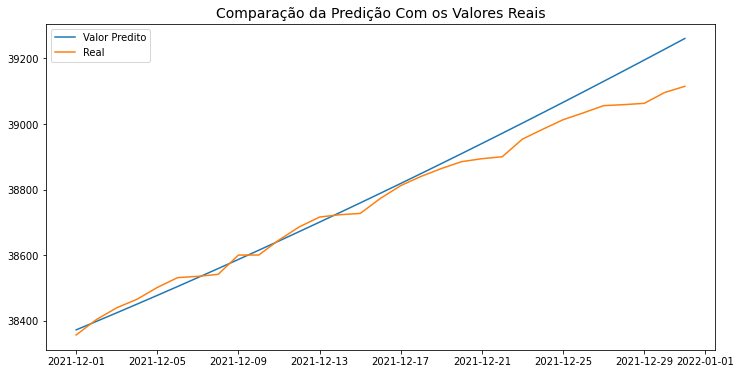

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,fc,label='Valor Predito')
plt.plot(teste.index,teste['Deaths'].values,label='Real')
plt.legend()